**Problem Statement :** The aim of this analysis is given weather parameters about Australia, can we predict whether or not they have rain today?

We will use **Logistic Regression, Decision Tree, Adaboost and Random Forest** algorithms to predict the the rainfall

### Importing the required Libraries and Packages

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, log_loss, classification_report

### Reading the Dataset

We shall work with the german_credit_data.csv file which is given by the company to analyse the data and make the model.

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#Shape of the dataset
data.shape

(145460, 23)

##### Checking the Data types of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Observations :**

 - The Date column needs converted to a datetime datatype
 - The datatypes for all other columns look good as is
 - There appears to be a large number of missing values across multiple columns

### Exploratory Data Analysis

In [5]:
## Checking the statistics of the numerical data
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### Insights from the summary:

 - There are a total of 145460 observations.
 - Most of the columns have some missing values.
 - Multiple columns have clear outliers (e.g., the max Rainfall value is 371.0 despite the 75th percentile being 0.8)

In [6]:
## Checking the number of unique values present in each column
pd.DataFrame({"No. of unique values": list(data.nunique())}, index=data.columns)

,No. of unique values
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


##### Checking the missing values

In [7]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

We can see that almost all the columns contains so many missing values except in Date and Location. 

We should not drop the missing values as they are huge and may affect the performance of the model.

In [8]:
### Checking the percentages of the missing data column wise
round((data.isna().sum()/len(data))*100, 3)

Date              0.000
Location          0.000
MinTemp           1.021
MaxTemp           0.867
Rainfall          2.242
Evaporation      43.167
Sunshine         48.010
WindGustDir       7.099
WindGustSpeed     7.056
WindDir9am        7.264
WindDir3pm        2.907
WindSpeed9am      1.215
WindSpeed3pm      2.105
Humidity9am       1.825
Humidity3pm       3.098
Pressure9am      10.357
Pressure3pm      10.331
Cloud9am         38.422
Cloud3pm         40.807
Temp9am           1.215
Temp3pm           2.481
RainToday         2.242
RainTomorrow      2.246
dtype: float64

**Observations :**

 - Evaporation, Sunshine, Cloud9am, and Cloud3pm have missing data more than 35% of their entire values.
 - Aside from Date and Location, all columns are missing at least some values
 - These missing values can be handled by either dropping certain columns/rows, imputing the values, or a mix of both

In [9]:
##### Counting the relative frequency of each value in the date column
pd.DataFrame(data.Date.value_counts())

,Date
2014-12-29,49
2015-03-04,49
2015-05-10,49
2016-12-15,49
2017-03-04,49
...,...
2008-01-25,1
2007-12-02,1
2007-12-28,1
2007-12-13,1


In [10]:
##### Counting the total unique values in the Location column
data.Location.nunique()

49

The maximum number of observations for a given date aligns with the number of unique locations within the dataset. This intuitively makes sense because each weather station at the different locations would be reporting their own data for a given day.

map() is a built-in function that allows you to process and transform all the items in an iterable without using an explicit for loop.

So, we are transforming RainToday and RainTomorrow as 0 and 1. 0 means No and 1 means Yes

In [11]:
data.RainToday = data.RainToday.map({'No': 0, 'Yes': 1})
data.RainToday.value_counts(normalize=True)

0.0    0.775807
1.0    0.224193
Name: RainToday, dtype: float64

In [12]:
data.RainTomorrow = data.RainTomorrow.map({'No': 0, 'Yes': 1})
data.RainTomorrow.value_counts(normalize=True)

0.0    0.775819
1.0    0.224181
Name: RainTomorrow, dtype: float64

#### Plotting Histograms for all the Numeric Form of Data

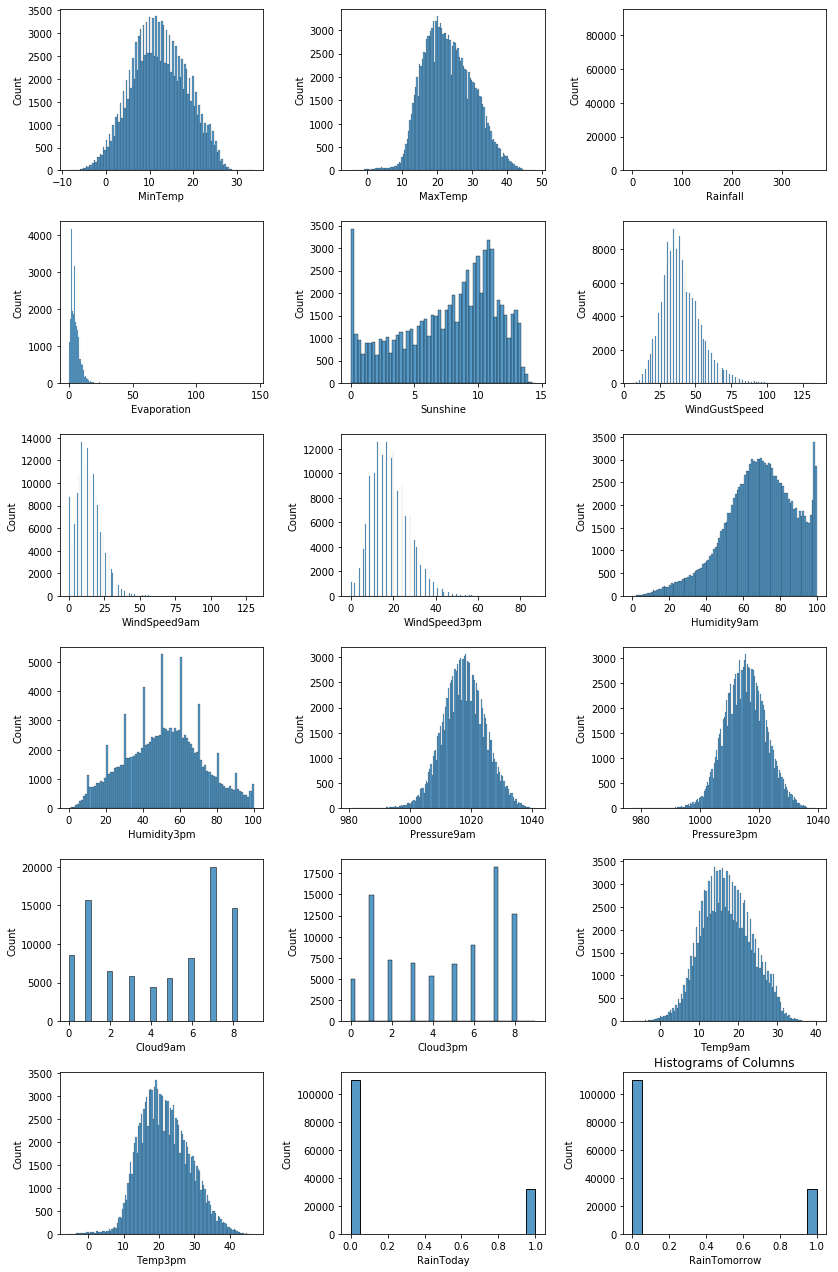

In [13]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in data.columns if data[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(data[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns');

**Observations :**

 - Most features are normally distributed as expected
 - The Rainfall distribution needs further investigation as the large outlier is likely affecting the ability to plot the data
 - The Sunshine distribution is interesting but largely explainable:
     - The high frequency of 0 values represents days where it is overcast all day
     - The abrupt decline in frequency after around 11 hours is a reflection of the limited number of days of the year where it  is light out for that many hours or longer
 - The Humidity9am distribution is particularly interesting due to the large spike in frequencies near 100%
 - We can see that there is an imbalance in our target variable which is RainTomorrow.

#### Plotting the RainToday vs Location

We will be grouping both the features RainToday and Location as follows

In [14]:
data_rain_by_loca = data.groupby(by = data.Location).sum()

#Creating a new column for storing the group by function
data_rain_by_loca = data_rain_by_loca[['RainToday']]
data_rain_by_loca.head()

,RainToday
Location,
Adelaide,689.0
Albany,902.0
Albury,617.0
AliceSprings,244.0
BadgerysCreek,583.0


Text(0.5, 1.0, 'Rainy Days by Location')

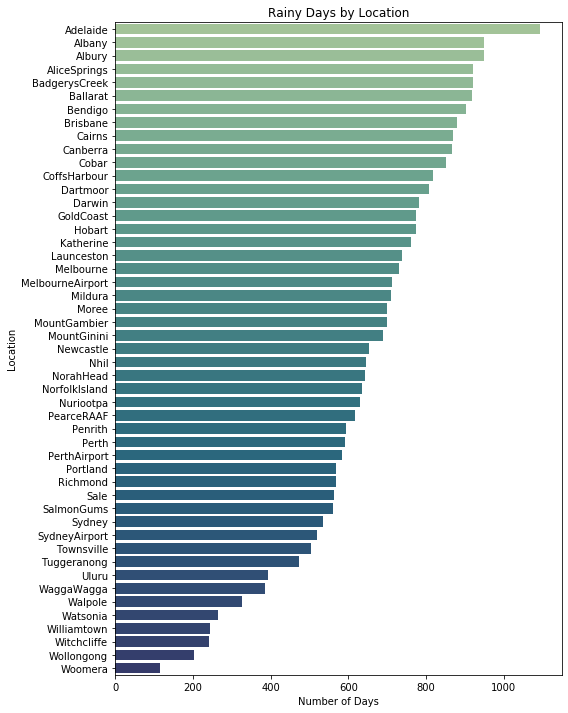

In [15]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=data_rain_by_loca.index, 
            data=data_rain_by_loca.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')

The above chart is useful for a quick check on the differences between locations with regard to the number of rainy days but suffers from one key issue: the number of observations from each location is not exactly the same. 

In [16]:
data.Location.value_counts()

Canberra            3436
Sydney              3344
Melbourne           3193
Hobart              3193
Brisbane            3193
Darwin              3193
Perth               3193
Adelaide            3193
Albury              3040
Launceston          3040
MountGinini         3040
Wollongong          3040
AliceSprings        3040
MountGambier        3040
Cairns              3040
Bendigo             3040
Ballarat            3040
Townsville          3040
Albany              3040
GoldCoast           3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
NorfolkIsland       3009
Nuriootpa           3009
Mildura             3009
Dartmoor            3009
Moree               3009
Portland            3009
Richmond            3009
WaggaWagga          3009
BadgerysCreek       3009
MelbourneAirport    3009
Sale                3009
Witchcliffe         3009
Cobar               3009
PerthAirport        3009
PearceRAAF          3009
SydneyAirport       3009
Woomera             3009


Checking the value counts for each location reveals that the locations of Katherine, Nhil, and Uluru should be ignored when analyzing the above plot. The remaining locations have value counts that are close enough to be properly comparable.

### Seasonality

Rainfall exhibits seasonality in many areas of the world. Through grouping the data by month of the year, the percentage of days that it rains in a given month can be easily calculated. Any sort of trend would indicate that the month of the year is a valuable piece of information for modeling purposes.

In [17]:
data_seasonality = data.copy()
data_seasonality['month'] = data_seasonality.Date.apply(lambda x: int(str(x)[5:7]))
data_seasonality[['Date', 'month']].head()

,Date,month
0,2008-12-01,12
1,2008-12-02,12
2,2008-12-03,12
3,2008-12-04,12
4,2008-12-05,12


In [18]:
data_seasonality_grouped = data_seasonality.groupby('month').mean()
data_seasonality_grouped[['RainToday']]

,RainToday
month,
1,0.189484
2,0.206746
3,0.217135
4,0.216845
5,0.222163
6,0.263638
7,0.270736
8,0.253167
9,0.229135


Text(0, 0.5, 'Percentage of Days it Rains')

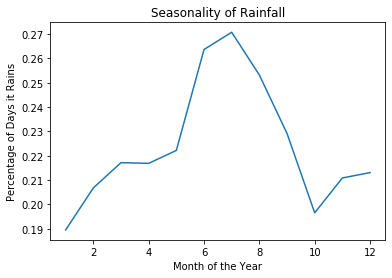

In [19]:
sns.lineplot(data=data_seasonality_grouped, x=data_seasonality_grouped.index, y='RainToday')
plt.title('Seasonality of Rainfall')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Days it Rains')

Rainfall in Australia clearly has a degree of seasonality.

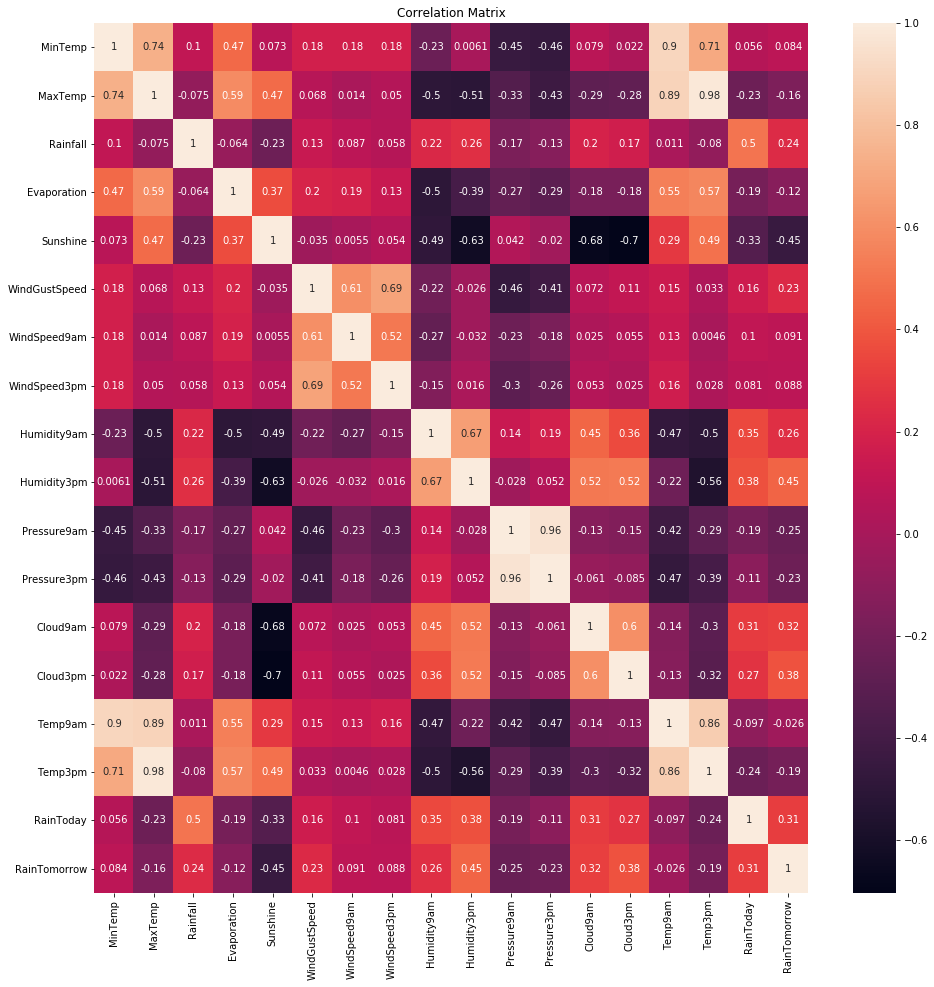

In [20]:
plt.figure(figsize=(16, 16))
plt.title('Correlation Matrix')
sns.heatmap(data.corr(), annot=True)

## Data Pre-Processing

### Dealing with Missing Values

The primary preprocessing need for this dataset is handling the missing values. Since we are involved with more than 2 variable quantities, we will be using **Iterative Imputer** from the sklearn module. 

This **IterativeImputer** models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned."

I do not want to impute values for the target variable (RainTomorrow) since this will detract from the ground truth and have potential negative effects on the model. To start, I'll drop rows in which the RainTomorrow value is missing.

In [21]:
imputed_data = data.dropna(subset = ['RainTomorrow'], axis = 0)
imputed_data.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

##### Continuous Features(Numerical)

For the continuous features, I'll apply the IterativeImputer.

In [22]:
features = [col for col in imputed_data.columns if imputed_data[col].dtype != object]
features.remove('RainTomorrow')
features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [23]:
#Importing the required libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)
imputed_data_cont = imputer.fit_transform(imputed_data[features])
imputed_data_cont = pd.DataFrame(imputed_data_cont, columns=features)
imputed_data_cont.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.103048,16.9,21.8,0.0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.912027,2.640581,17.2,24.3,0.0
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.014404,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.201990,1.993914,18.1,26.5,0.0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [24]:
imputed_data_cont.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

##### Categorical Features

In [25]:
categorical_features = [col for col in imputed_data.columns if col not in features]

#Removing the target variable
categorical_features.remove('RainTomorrow')

#Also removing the Date and Location, since they have no missing values
categorical_features.remove('Date')
categorical_features.remove('Location')

categorical_features

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [26]:
imputed_data_cate = imputed_data[categorical_features]
for col in imputed_data_cate.columns:
    values = imputed_data_cate.WindDir3pm.value_counts().reset_index()['index'].values
    probs = imputed_data_cate[col].value_counts(normalize=True).values
    imputed_data_cate[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)

imputed_data_cate.head()

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [27]:
imputed_data_cate.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

#### Concatinating

Now that the missing values have been handled, I need to place all of the separated dataframes back together into one final dataframe as I seperated each of them.

In [28]:
#Creating a new data frame and adding the Date and Location
data_date_loca = imputed_data[['Date', 'Location']]
#Adding Rain Tomorrow
data_target = imputed_data.RainTomorrow

In [29]:
final_imputed_data = pd.concat(objs = [data_date_loca.reset_index(drop = True),
                                      data_target.reset_index(drop = True),
                                      imputed_data_cont.reset_index(drop = True),
                                      imputed_data_cate.reset_index(drop = True)], axis = 1)
final_imputed_data.shape

(142193, 23)

In [30]:
final_imputed_data.head()

,Date,Location,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,2008-12-01,Albury,0.0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,...,1007.7,1007.1,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW
1,2008-12-02,Albury,0.0,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,...,1010.6,1007.8,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW
2,2008-12-03,Albury,0.0,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,...,1007.6,1008.7,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW
3,2008-12-04,Albury,0.0,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,...,1017.6,1012.8,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E
4,2008-12-05,Albury,0.0,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW


Let's do a quick check again if there are any missing values in the dataset

In [31]:
final_imputed_data.isna().sum()

Date             0
Location         0
RainTomorrow     0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
dtype: int64

#### Extracting Month

As seen in the EDA section, rainfall is exhibiting seasonality. Instead of using the full date from the Date column, extracting just the month is much more valuable.

In [32]:
data_month =final_imputed_data.copy()
data_month.insert(1, 'Month', data_month.Date.apply(lambda x: int(str(x)[5:7])))
data_month.drop(columns='Date', inplace=True)
data_month.head()

,Month,Location,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,12,Albury,0.0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,...,1007.7,1007.1,8.000000,5.103048,16.9,21.8,0.0,W,W,WNW
1,12,Albury,0.0,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,...,1010.6,1007.8,1.912027,2.640581,17.2,24.3,0.0,WNW,NNW,WSW
2,12,Albury,0.0,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,...,1007.6,1008.7,2.014404,2.000000,21.0,23.2,0.0,WSW,W,WSW
3,12,Albury,0.0,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,...,1017.6,1012.8,1.201990,1.993914,18.1,26.5,0.0,NE,SE,E
4,12,Albury,0.0,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW


#### Dummy Variables

All categorical features now need to be transformed into dummy variables in order to be useable in the modeling section.

In [33]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
data_dummies = pd.get_dummies(data_month, columns=categoricals)
data_dummies.head()

,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
#Displaying the columns in the dummy variable
data_dummies.columns

Index(['RainTomorrow', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=127)

## Modelling

#### Initializing the Predictor and Target Variables and Splitting the dataset

Splitting of test and train should be of usually 20% - 40% test data and 60% - 80% train data so that it will not impact on the model accuracy. So, here I am dividing the data into 80% train data and 20% test data

In [35]:
#Importing the required library and packages
from sklearn.model_selection import train_test_split

#Creating a copy of the dummy variable
final_data = data_dummies.copy()

#Declaring the predictor and target variables
X = final_data.drop(['RainTomorrow'], axis = 1)
y = final_data.RainTomorrow

#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Printing the train and test data sizes
print('Size of Train data : ', X_train.shape)
print('Size of Test data : ', X_test.shape)

Size of Train data :  (113754, 126)
Size of Test data :  (28439, 126)


### Logistic Regression

In [36]:
#Importing the required libraries
from sklearn.linear_model import LogisticRegression

#Calling the logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Predicting on test data
y_pred = logreg.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

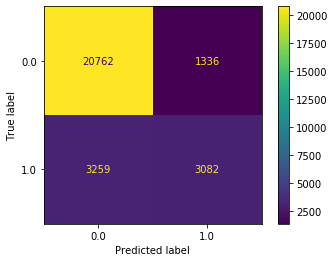

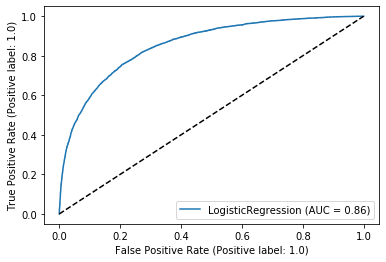

In [37]:
#Importing the required libraries and packages
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

#Plotting the confuison matrix
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

#Plotting the roc_curve
plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()

In [38]:
#Printing the intercept of the model
logreg.intercept_

array([0.00069238])

In [39]:
#Printing the coefficients of the model
logreg.coef_

array([[-1.49843445e-02,  3.04770717e-02,  2.14355941e-02,
        -3.59110544e-02, -1.40140304e-01,  6.24577572e-02,
        -2.35050181e-02, -1.36276360e-02,  1.67708957e-03,
         5.22910316e-02,  7.03275125e-02, -7.76315904e-02,
         2.47557630e-02,  1.02247138e-01,  1.62359132e-02,
         2.34948483e-02,  2.71493374e-02, -8.10203626e-03,
        -6.20741715e-03, -4.49206228e-03,  9.53259682e-04,
         3.60448153e-04, -3.53079355e-04,  4.94339685e-03,
         9.43488514e-03,  5.71898393e-03,  5.70229326e-04,
         1.00591557e-04, -2.23482944e-03,  4.61857136e-03,
        -8.76920909e-04,  2.41738356e-03,  1.35481598e-04,
         6.97859619e-04, -3.10640687e-03,  9.82030937e-04,
         3.60133218e-03,  1.07051548e-03,  1.56836500e-03,
         1.42137498e-03,  5.47936595e-04,  3.24731772e-04,
        -7.10408285e-04, -2.93961866e-03, -1.13683583e-03,
        -1.06230099e-03, -1.03284320e-03,  1.77498926e-03,
        -1.66594527e-03,  5.47142591e-05,  1.30322830e-0

In [40]:
#Checking accuracy on the train and test data
print('Train score:', round(logreg.score(X_train, y_train), 4))
print('Test score: ', round(logreg.score(X_test, y_test), 4))

Train score: 0.8429
Test score:  0.8384


We can see that the accuracy on the train and test is almost equal.

**Observations :**

 - Decent performance of the model
 - The model is well fit, with both the train and test scores approximately the same

##### K fold Cross Validation

In [41]:
#Importing the required library
from sklearn.model_selection import cross_val_score

#Cross validation Score for 10 folds
lr_finalscore=cross_val_score(logreg, X_test, y_test, cv = 10).mean()
lr_finalscore

0.8380042426608053

We can see that using k-fold cross validation, the score on the test data is 83.8%

Let's imporve the performance of the Logistic Regression model using **Model Tuning**

In [42]:
#Calling the logistic regression using model tuning
logreg_tuning = LogisticRegression(solver = 'liblinear', random_state = 42)
logreg_tuning.fit(X_train, y_train)

#Predicting on test data
y_pred1 = logreg_tuning.predict(X_test)
y_pred1

array([1., 0., 0., ..., 0., 0., 0.])

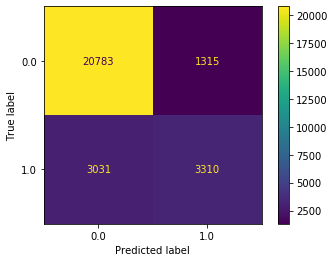

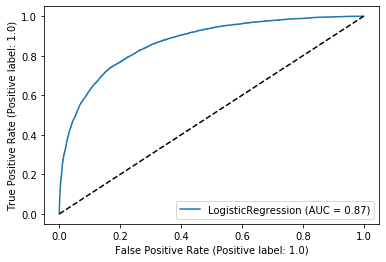

In [43]:
#Plotting the confuison matrix
plot_confusion_matrix(logreg_tuning, X_test, y_test)
plt.show()

#Plotting the roc_curve
plot_roc_curve(logreg_tuning, X_test, y_test)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()

In [44]:
#Checking accuracy on the train and test data
print('Train score:', round(logreg_tuning.score(X_train, y_train), 4))
print('Test score: ', round(logreg_tuning.score(X_test, y_test), 4))

Train score: 0.85
Test score:  0.8472


We can see that the model tuning didnot improve the accuracy on the train data. But it has showed some impact as increase in the test data.

**Observations :**

 - Decent performance of the model
 - The model is well fit, with both the train and test scores have been increased from the previous model without tuning.

##### K fold cross validation

In [45]:
#Cross validation Score for 10 folds
logreg_finalscore=cross_val_score(logreg_tuning, X_test, y_test, cv = 10).mean()
logreg_finalscore

0.8467948765517299

We can see that the accuracy score on test data using cross validation is almost same as the logreg with tuning model and increased when compared to the previous model

### Decision Tree

In [46]:
#Importing the Required library and packages
from sklearn.tree import DecisionTreeClassifier

#Calling the Decision Tree Classifier, fitting and predicting 
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
y_pred_tree

array([1., 1., 0., ..., 0., 0., 0.])

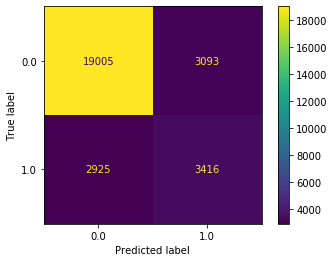

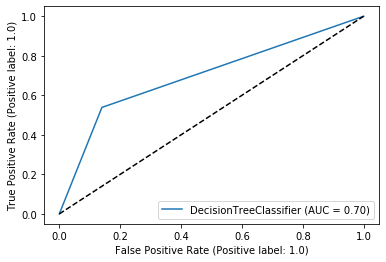

In [47]:
#Plotting the confuison matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

#Plotting the roc_curve
plot_roc_curve(clf, X_test, y_test)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()

In [48]:
#Checking accuracy on the train and test data
print('Train score:', round(clf.score(X_train, y_train), 4))
print('Test score: ', round(clf.score(X_test, y_test), 4))

Train score: 1.0
Test score:  0.7884


**Observations :**

 - The accuracy is lower than the tuned logisitic regression model
 - The model is overfit, given by the much higher score for the train data versus the test data

#### Hyper Paramter Tuning

In [49]:
#Importing the required library
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

clf_gs = GridSearchCV(clf, param_grid=params, scoring='accuracy', n_jobs=-1, cv=3)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='accuracy')

In [50]:
clf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 42}

In [51]:
round(clf_gs.best_score_, 4)

0.8415

In [52]:
y_pred_tree_gs = clf_gs.best_estimator_.predict(X_test)
y_pred_tree_gs

array([1., 0., 0., ..., 0., 0., 0.])

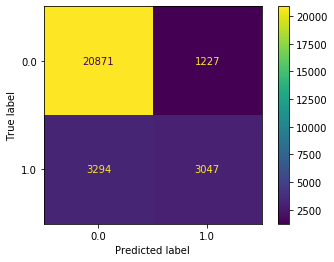

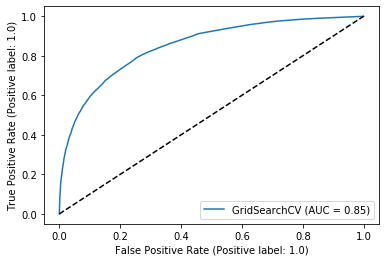

In [53]:
#Plotting the confuison matrix
plot_confusion_matrix(clf_gs, X_test, y_test)
plt.show()

#Plotting the roc_curve
plot_roc_curve(clf_gs, X_test, y_test)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()

In [54]:
#Checking accuracy on the train and test data
print('Train score:', round(clf_gs.score(X_train, y_train), 4))
print('Test score: ', round(clf_gs.score(X_test, y_test), 4))

Train score: 0.8484
Test score:  0.841


**Observations :**

 - Solid increases in the evaluation metrics
 - The tuned model is much better fit than the base model which showed overfitness

### Adaboost

In [55]:
#Importing the required libraries
from sklearn.ensemble import AdaBoostClassifier

#Calling the Adaboost Classifier and fitting the train data
ada_model1 = AdaBoostClassifier(n_estimators = 100)

#Fitting the model
ada_model1 = ada_model1.fit(X_train, y_train) 

#Predicting the test data
ada_model1_predict = ada_model1.predict(X_test)

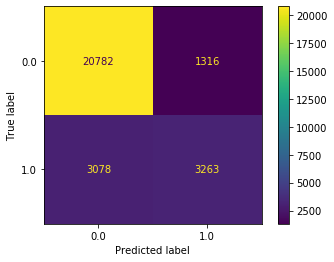

In [56]:
#Plotting the confuison matrix
plot_confusion_matrix(ada_model1, X_test, y_test)
plt.show()

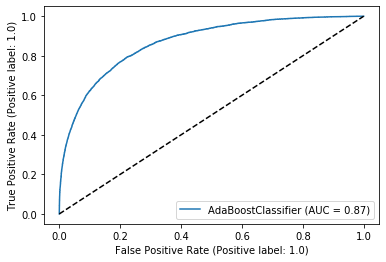

In [57]:
#Plotting the roc_curve
plot_roc_curve(ada_model1, X_test, y_test)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()

In [58]:
#Checking accuracy on the train and test data
print('Train score:', round(ada_model1.score(X_train, y_train), 4))
print('Test score: ', round(ada_model1.score(X_test, y_test), 4))

Train score: 0.8509
Test score:  0.8455


In [59]:
#Printing the classification report
print(classification_report(y_test, ada_model1_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     22098
         1.0       0.71      0.51      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.79      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439



**Observations :**

 - Decent performance of the model
 - The model is well fit, with good accuracy.

#### Hyper Paramter Tuning of Adaboost Algorithm

In [60]:
#Initiating the Adaboost classifier
ada_model2 = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.25, algorithm = 'SAMME')

#Fitting the model
ada_model2 = ada_model2.fit(X_train, y_train) 

#Predicting the test data
ada_model2_predict = ada_model2.predict(X_test)

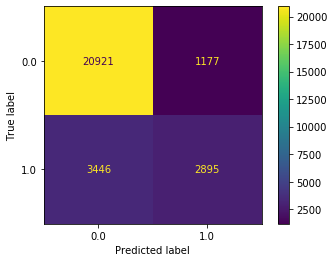

In [61]:
#Plotting the confuison matrix
plot_confusion_matrix(ada_model2, X_test, y_test)
plt.show()

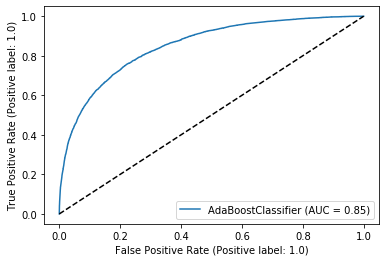

In [62]:
#Plotting the roc_curve
plot_roc_curve(ada_model2, X_test, y_test)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()

In [63]:
#Checking accuracy on the train and test data
print('Train score:', round(ada_model2.score(X_train, y_train), 4))
print('Test score: ', round(ada_model2.score(X_test, y_test), 4))

Train score: 0.8424
Test score:  0.8374


In [64]:
#Printing the classification report
print(classification_report(y_test, ada_model2_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22098
         1.0       0.71      0.46      0.56      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.70      0.73     28439
weighted avg       0.83      0.84      0.82     28439



### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

#Initiating the random forest classifier
rf_model1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 4,random_state = 0)

#Fitting the model
rf_model1 = rf_model1.fit(X_train, y_train) 

#Predicting the test data
rf_model1_predict = rf_model1.predict(X_test)

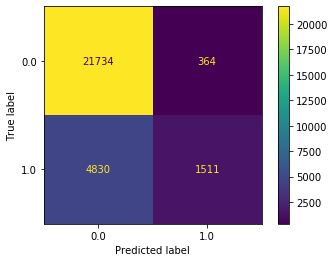

In [66]:
#Plotting the confuison matrix
plot_confusion_matrix(rf_model1, X_test, y_test)
plt.show()

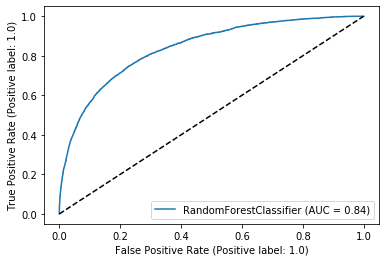

In [67]:
#Plotting the roc_curve
plot_roc_curve(rf_model1, X_test, y_test)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.show()

In [68]:
#Checking accuracy on the train and test data
print('Train score:', round(rf_model1.score(X_train, y_train), 4))
print('Test score: ', round(rf_model1.score(X_test, y_test), 4))

Train score: 0.821
Test score:  0.8174


In [69]:
#Printing the classification report
print(classification_report(y_test, rf_model1_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     22098
         1.0       0.81      0.24      0.37      6341

    accuracy                           0.82     28439
   macro avg       0.81      0.61      0.63     28439
weighted avg       0.82      0.82      0.78     28439



In [70]:
'''
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [4, 6, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf_model1, param_grid, cv=10, scoring='accuracy')
grid_search_forest.fit(X_train, y_train)
'''

"\nparam_grid = [\n{'n_estimators': [10, 25], 'max_features': [5, 10], \n 'max_depth': [4, 6, None], 'bootstrap': [True, False]}\n]\n\ngrid_search_forest = GridSearchCV(rf_model1, param_grid, cv=10, scoring='accuracy')\ngrid_search_forest.fit(X_train, y_train)\n"

### Model Comparisions

In [71]:
from sklearn import model_selection
random_seed = 12
outcome = []
model_names = []
models = [('Logistic Regression', logreg),
          ('Logistic Regression(Tuning)', logreg_tuning),
          ('Decision Tree', clf),
         ('Decision Tree(Hyperparameter Tuning)', clf_gs),
         ('AdaBoost Classifier', ada_model1),
         ('AdaBoost Classifier(Hyperparamter Tuning)', ada_model2),
         ('Random Forest Classifier', rf_model1)]

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.842573 (0.001876)


In [ ]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (15, 5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Conclusion

### Results

The best performing model is the **hyperparameter-tuned Logistic Regression** model with an accuracy of approximately 84.68%. The scores for both the training and testing data were almost similar, reducing concerns of the model being overfit.

### Next Steps

While this model is a good starting point for rain prediction in Australia, there are several ways in which the model could be improved upon:

 - Further hyperparameter tuning
 - Engineering new features such as trailing amounts of rain or sunshine
 - Collecting additional data from nearby countries (for example, does rain originating in Indonesia or New Zealand have predictive power?)